In [2]:
import pandas as pd
import numpy as np
from plots.Folium_heat import *
from plots.Folium_heat_time import *
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import *
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from xgboost import XGBClassifier
df = pd.read_pickle("data/data0705.pkl")
import matplotlib

# Predictions

The goal of this sections is to see if we can create a model which can predict which Energy Label a building has, based on the the attribute of the building. It will be a multi-class classification problen since we have 7 labels available. If it was possible to achieve high accruacies it would give people the opperitunity see how well their house is doing energy wise, without hiring a company to make the assesment manually. It would also enable people who were looking to buy a house to see how well the house faired energy wise. 

The functions below are used to generate Performance metrics or plots to analyse the model.

In [25]:
def metrics(Y_test,y_pred,x_val,model):
    y_pred=y_pred
    x_val=x_val
    model=model
    auc=round(accuracy_score(Y_test,y_pred),4)
    f_score=round(f1_score(Y_test, y_pred),4)
    P_score=round(precision_score(Y_test,y_pred),4)
    recall=round(recall_score(Y_test, y_pred),4)
    
    ns_probs = [0 for _ in range(len(Y_test))]
    lr_probs = model.predict_proba(x_val)
    lr_probs = lr_probs[:, 1]
    # calculate scores
    ns_auc = roc_auc_score(Y_test, ns_probs)
    lr_auc = round(roc_auc_score(Y_test, lr_probs),4)
    return [auc,f_score,P_score,recall,lr_auc]

def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = importance
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    fi_df = fi_df[fi_df.feature_importance > 0.01]
    

    #Define size of bar plot
    plt.figure(figsize=(12,7),dpi=160)
    plt.tight_layout()
    plt.yticks(fontsize=7)
    #Plot Searborn bar chart
    ax=sns.barplot(y='feature_names',x='feature_importance',data=fi_df,palette="rocket")
    ax.set_xlabel('feature_importance')
    #plt.xticks(rotation = 90)
    
    #Add chart labels
    plt.title(model_type + ' FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCES > 0.01')
    plt.ylabel('FEATURE NAMES')


def evaluation_time(y_test,y_pred,model,x_val):
    ns_probs = [0 for _ in range(len(y_test))]
    lr_probs = model.predict_proba(x_val)
    lr_probs = lr_probs[:, 1]
    # calculate scores
    ns_auc = roc_auc_score(y_test, ns_probs)
    lr_auc = roc_auc_score(y_test, lr_probs)
    # summarize scores
    print(f"Test set accuracy score {(np.round(accuracy_score(y_pred,y_test),3)*100)}%")
    print(f"F1 score {np.round(f_score,3)}")
    print(f"Recall score {np.round(recall,3)}")
    print(f"Precision score {np.round(P_score,3)}")
    print('Model: ROC AUC=%.3f' % (lr_auc))
    # calculate roc curves
    ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
    lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
    plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Base')
    plt.plot(lr_fpr, lr_tpr, marker='.', label='XGBoost')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()


Here we make sure that we only keep unique buildings, and take the newest version of the building based on renovations. At the same time we create a binary attribute to indicate wether a building has gone through a bigger renovation.

Due to the sheer size of our data set, espacially in terms of the number of categorical data we must select a subset of our attributes to create the model on, to reduce the run time. After a trial and error proces and manually selecting columns which does not contain a lot of missing values, the following attributes below has been found. Most of them are self explanatory from the name.

We can now create our data set our final dataset for predictions, with our attributes X and target attribute Y - the Energy labels. All of our attributes in X but "offical Area" are categorical and will be dummy encoded in order for our model to be able to handle them. The final result is 71723 buildings and 67 attributes describing them, we for training and predicitng with our model.

In [3]:
test_liste=["Sewage connection_false",
            "Water Connection_true",
            "Current use_residential",
            1945,
            "Heat Supply_Biogas",
            "Material of roof_hot Mopped Asphalt",
            "Kommune_Frederiksberg",1933,203]

In [26]:
    X,y=[      'Sewage connection', 
              'Water Connection',
              'Current use',
              'BBR Date of renovation', #When the house was rennovated
              'Heat Supply',
              'Material of roof',
              'Material of wall',
              'Kommune',
              'Year of construction', #Intervals of 10 years
              #'has_been_rennovated', All have been rennovated
              'Area of building [m^2]' #Area of house in square meteres
              ],['Energy Label']

In [ ]:
import pickle
pickle.dump(model_xg, open('model.pkl','wb'))

In [27]:
    X,y=[      'Sewage connection', 
              'Water Connection',
              'Current use',
              'BBR Date of renovation', #When the house was rennovated
              'Heat Supply',
              'Material of roof',
              'Material of wall',
              'Kommune',
              'Year of construction', #Intervals of 10 years
              #'has_been_rennovated', All have been rennovated
              'Area of building [m^2]' #Area of house in square meteres
              ],['Energy Label']

In [21]:
test_liste=["Sewage connection_false",
            "Water Connection_true",
            "Current use_residential",
            1945,
            "Heat Supply_Biogas",
            "Material of roof_hot Mopped Asphalt",
            "Kommune_Frederiksberg",1933,203]

def user_input_model(df,liste):
    #Define input variables and target variable
    X,y=[      'Sewage connection', 
              'Water Connection',
              'Current use',
              'BBR Date of renovation', #When the house was rennovated
              'Heat Supply',
              'Material of roof',
              'Material of wall',
              'Kommune',
              'Year of construction', #Intervals of 10 years
              #'has_been_rennovated', All have been rennovated
              'Area of building [m^2]' #Area of house in square meteres
              ],['Energy Label']

    pred_df=df.sort_values(by=['Energy Label'])
    y=pred_df[y].values
    x=pred_df[X]
    x=pd.get_dummies(x)
    index_dict = dict(zip(x.columns,range(x.shape[1])))
    scaler = StandardScaler()
    x=scaler.fit_transform(x)
    
    new_vector = np.zeros(len(index_dict))
    try:
        new_vector[index_dict[liste[0]]] = 1
    except:
        pass
    try:
        new_vector[index_dict[liste[1]]] = 1
    except:
        pass
    try:
        new_vector[index_dict[liste[2]]] = 1
    except:
        pass
    try:
        new_vector[index_dict[liste[3]]] = liste[3]
    except:
        pass
    try:
        new_vector[index_dict[liste[4]]] = 1
    except:
        pass
    try:
        new_vector[index_dict[liste[5]]] = 1
    except:
        pass
    try:
        new_vector[index_dict[liste[6]]] = 1
    except:
        pass
    try:
        new_vector[index_dict[liste[7]]] = 1
    except:
        pass
    try:
        new_vector[index_dict[liste[8]]] = liste[8]
    except:
        pass
    try:
        new_vector[index_dict[liste[9]]] = liste[9]
    except:
        pass
    new_vector = new_vector.reshape(1,-1)
    new_vector=scaler.transform(new_vector)
    Prediction = model_xg.predict(new_vector) ### Kald din gemte model her

    return Prediction

In [22]:
user_input_model(df,test_liste)

array(['D'], dtype=object)

In [28]:
pred_df=df.sort_values(by=['Energy Label'])
y=pred_df[y].values
x=pred_df[X]
x=pd.get_dummies(x)
index_dict = dict(zip(x.columns,range(x.shape[1])))
labels=list(x.columns)
x=x.values
print(np.shape(x))
scaler = StandardScaler()
x=scaler.fit_transform(x)
print(np.shape(x))

(71722, 72)
(71722, 72)


We split our data set in a ratio 80/20 to a train and test set, and shuffle it randomly. Then we apply the tree based ensamble model XGBOOST classifier model to the data with default hyperparameter values.

In [29]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

model_xg = XGBClassifier(objective ='binary:logistic',verbosity = 0,silent=True)
model_xg.fit(X_train, y_train)
y_pred = model_xg.predict(X_test) #Collapsed due to label warning from XGpackage

/Users/martinillum/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/martinillum/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Right out of the box the model scores 46,8% which would be a fairly accuracy for a binaray classification problem, however since this is a multi classification problem of 7 classes it becomes more manageable. Lets see if we can increase the performance by tuning the hyper parameters. The Hyperparameters and their definitions can be found [here](https://xgboost.readthedocs.io/en/stable/parameter.html )

In [30]:
print(f"Test set accuracy score {(np.round(accuracy_score(y_pred,y_test),3)*100)}%")

Test set accuracy score 47.099999999999994%


### Hyperparamter tuning

We will be using random search to find the optimize our hyperparameters. By using random search we will most likely not find the optimal combination, however we will reduce the running time significantly compared to a grid search.

In [31]:
params = {
 "learning_rate" : [0.05,0.10,0.15,0.20,0.25,0.30],
 "max_depth" : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma": [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
}

In [32]:
rs_model=RandomizedSearchCV(model_xg,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=0)
rs_model.fit(X_train,y_train)

/Users/martinillum/opt/anaconda3/lib/python3.8/site-packages/xgboost/compat.py:31: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/martinillum/opt/anaconda3/lib/python3.8/site-packages/xgboost/compat.py:31: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/martinillum/opt/anaconda3/lib/python3.8/site-packages/xgboost/compat.py:31: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/martinillum/opt/anaconda3/lib/python3.8/site-packages/xgboost/compat.py:31: FutureWarning: pandas.Int64Index is deprecated and will be removed from panda

KeyboardInterrupt: 

The optimal hyperparameters are found to be:

In [ ]:
import pickle
pickle.dump(rs_model, open('model.pkl','wb'))

In [12]:
rs_model.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=8,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, silent=True, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=0)

The hyperparameters are fitted and the accuracy score is calculated to 46.7% We can see that the model performance is basically the same, just 0.1 lower which is not optimal, however since random search is a random process, this can happen

In [13]:
y_pred = rs_model.predict(X_test)
print(f"Test set accuracy score {(np.round(accuracy_score(y_pred,y_test),3)*100)}%")

Test set accuracy score 46.7%


Wether 46.7% is good accuracy for 7 classes depends on the class representation of our taget attribute. Below a heatmap of the confusion matrix of all classes is plotted:

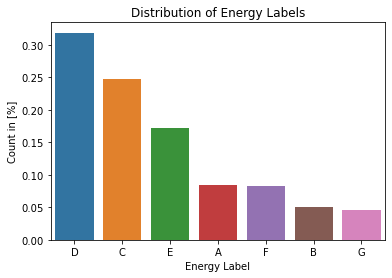

In [32]:
sns.barplot(x=pred_df.EnergyLabelClassification.value_counts().index,
            y=pred_df.EnergyLabelClassification.value_counts(normalize=True),
)
plt.title("Distribution of Energy Labels")
plt.xlabel("Energy Label")
plt.ylabel("Count in [%]");

It is clear that the energylabel D rerpresents roughly 33% of all cases, so if we were to take guess at C everytime we could reach an accuracy of 33% which our model is supirior too. However lets have a deeper look into the predictions. It is very interessant wether of model predicts G when it is in reality an A. Or if it just predicts one label to high or too low. This will be illustrated in the Heatmap of the confusion matrix below:

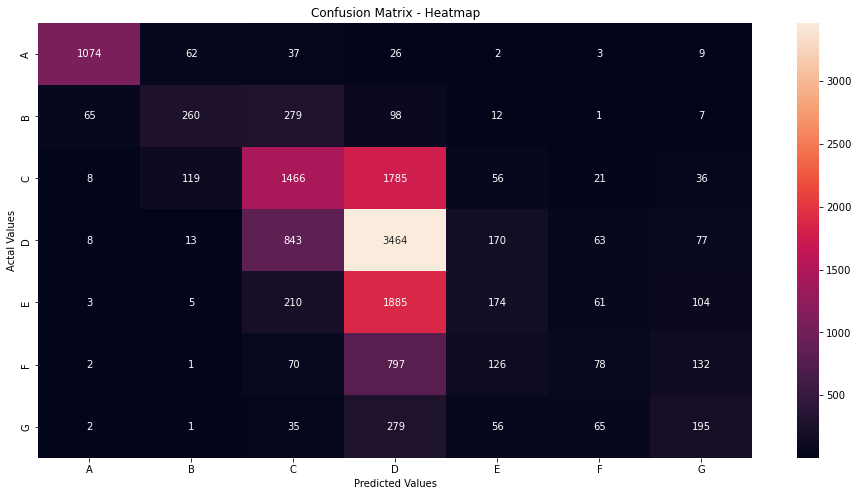

In [34]:
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm,
                     index = sorted(list(df.EnergyLabelClassification.unique())), 
                     columns = sorted(list(df.EnergyLabelClassification.unique())))
#Plotting the confusion matrix
plt.figure(figsize=(16,8))
sns.heatmap(cm_df, annot=True,fmt='g')
plt.title('Confusion Matrix - Heatmap')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

The rule of thumb here is that we cells in the diagonal to be the brightest, and the cells just around them if that is not the case. We can quickly see that our model is really good at Predicting energyLabels of "A", "G" and it rarely confuses it with  another class. We we look at the classes C & D the model has a hard time differentiating between the classes, espacially the value D.

Lets have a further look at which attribute plays the biggest role for the prediction based on impurity / Gain

Its clear to see that the most important attribute for the energylabel is the heating source of the house and what year it is built. We saw in the exploratory analysis that the heating source varied a lot depending which municipality the hous was located in of greater copenhagen. It can also be assummed that the attributes "Materials of walls" and "material of roofs" might be highly correlated to the "Year of construction interval", because certain materials for builting was used in different decades.

Over all the model is not fantastic, however it will give a good approximation on the energylabel + - one catergory level. There are several things that could be done to improve it, more data of actual energy usage, adding a K-nearest neighbhour model to compare a bulding with it K nearest neighbhours.

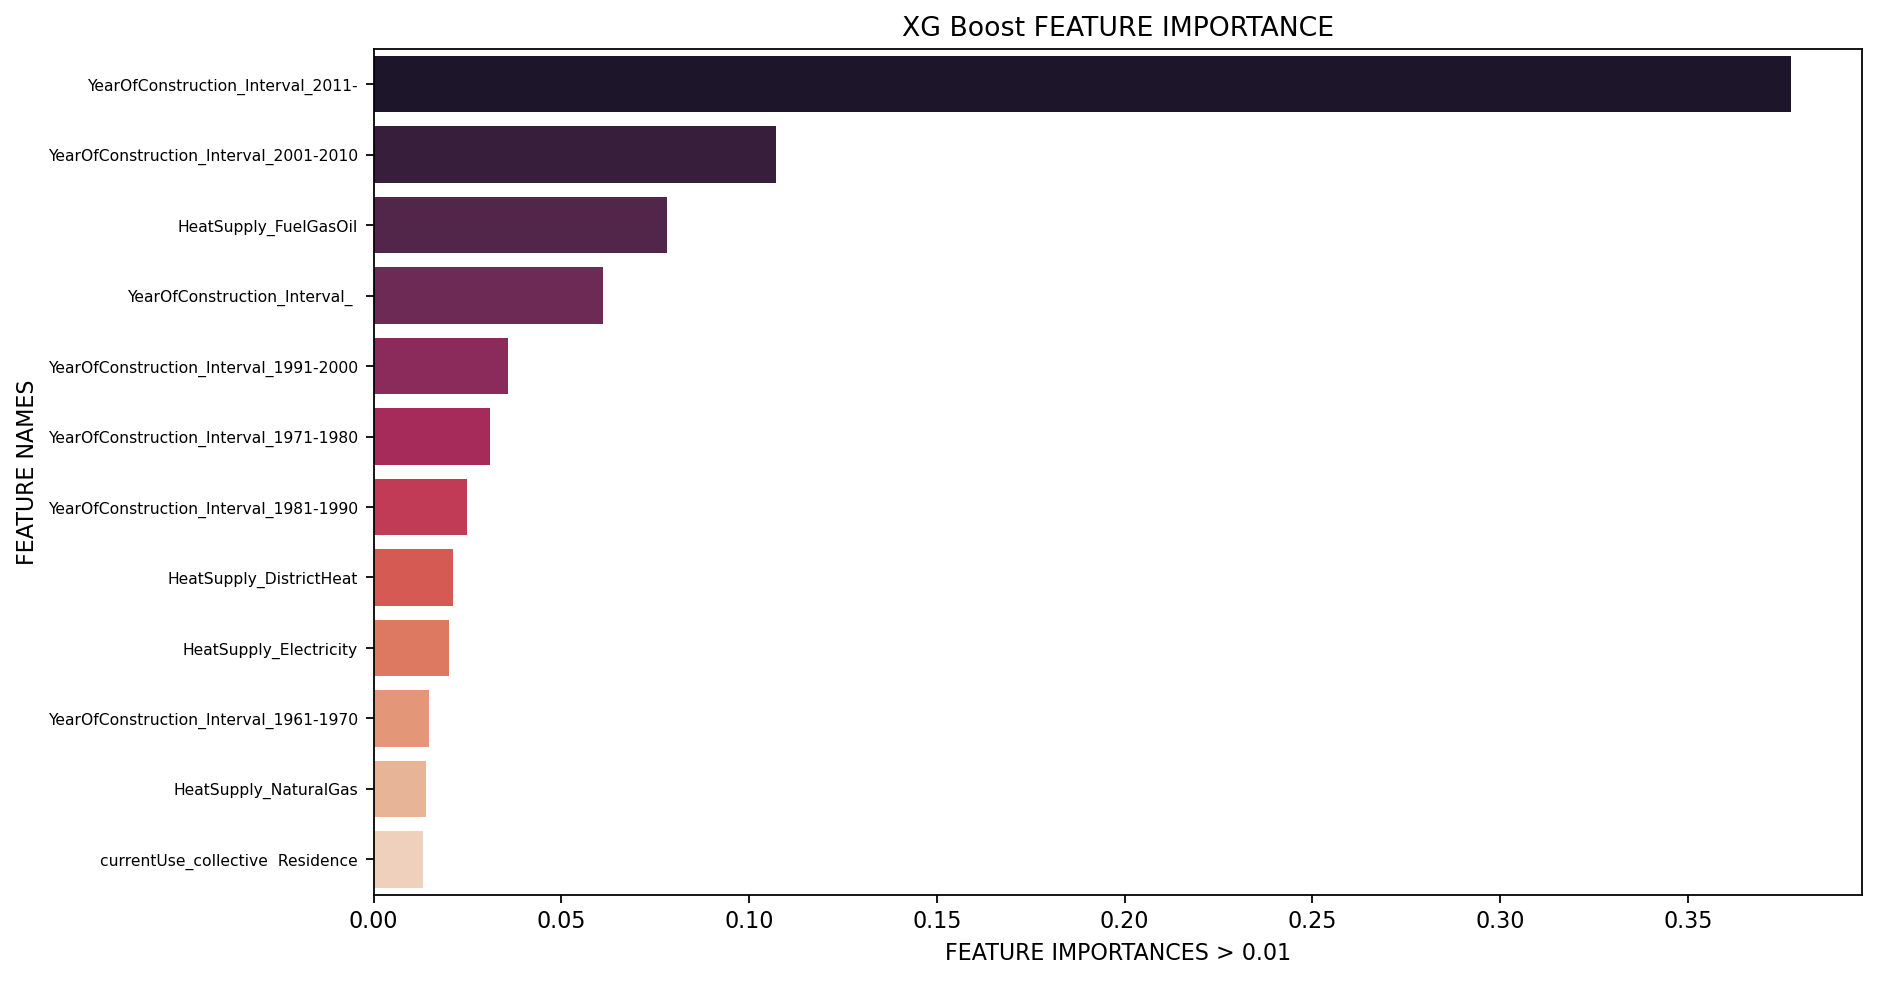

In [35]:
plot_feature_importance(model_xg.feature_importances_,labels,"XG Boost")

## Animation Plot

In [4]:
df

,index,Unnamed: 0,Unnamed: 0.1,id,geom,addressRepresentation,beginLifeSpanVersion,buildingNature,conditionOfConstruction,connectionToGas,...,Kvadratmeterpris,Antal til salg pr. indbygger,Gennemsnitslig husleje,Kommuneskat,Grundskyld,Bruttoledige,Gæld,Pensionsopsparing,YearOfConstruction_Interval,YearOfRenovation_Interval
0,0,0,1878,1881,GP,"Elledamsvej 5, 2840 Holte",2015-01-05T16:29:11.950,other,functional,other:unpopulated,...,37466,0.0107,936,0.3521,22.930‰,0.0817,1806779,1772259,1931-1940,NaN
1,1,1,1878,1881,GP,"Elledamsvej 5, 2840 Holte",2015-01-05T16:29:11.950,other,functional,other:unpopulated,...,37466,0.0107,936,0.3521,22.930‰,0.0817,1806779,1772259,1931-1940,NaN
2,2,2,3028,3031,GP,"Vejlesøvej 36, 2840 Holte",2015-01-05T17:04:27.490,other,functional,other:unpopulated,...,37466,0.0107,936,0.3521,22.930‰,0.0817,1806779,1772259,1901-1910,NaN
3,3,3,5733,5736,GP,"Parcelvej 53, 2840 Holte",2015-01-05T16:47:42.557,other,functional,other:unpopulated,...,37466,0.0107,936,0.3521,22.930‰,0.0817,1806779,1772259,1921-1930,NaN
4,4,4,8093,8096,GP,"Vejlemosevej 4F, 2840 Holte",2016-10-20T16:00:12.350,other,functional,other:unpopulated,...,37466,0.0107,936,0.3521,22.930‰,0.0817,1806779,1772259,1931-1940,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123055,106046,106046,5135511,5135514,GP,"Karise Alle 23, 2650 Hvidovre",2017-08-22T14:55:24.737,storage Tank,demolished,other:unpopulated,...,30356,0.0030,895,0.3837,29.700‰,0.1096,679388,830552,1961-1970,NaN
123056,106047,106047,4971033,4971036,GP,"Catherine Boothsvej 18D, 2650 Hvidovre",2021-06-30T09:09:41.177,other,under Construction,other:unpopulated,...,30356,0.0030,895,0.3837,29.700‰,0.1096,679388,830552,2011-,NaN
123057,106048,106048,4972335,4972338,GP,"Stamholmen 156, 2650 Hvidovre",2020-11-26T13:14:05.659,other,under Construction,other:unpopulated,...,30356,0.0030,895,0.3837,29.700‰,0.1096,679388,830552,2011-,NaN
123058,106049,106049,4980232,4980235,GP,"Catherine Boothsvej 18C, 2650 Hvidovre",2021-07-01T12:19:32.679,other,under Construction,other:unpopulated,...,30356,0.0030,895,0.3837,29.700‰,0.1096,679388,830552,2011-,NaN


In [5]:
def update(df, date):
    # Filters dataframe to rows at the date
    data = df[df['date']]

    # Assigns filtered data to x,y variables
    x = data['state']
    y = data['cases']

    # Creates matplotlib figure and axes to plot graph
    fig, ax = matplotlib.pyplot.subplots(1,1,figsize=(9, 6))
    ax.bar(x, y)

    # Adds figure title as the date of that iteration
    fig.suptitle(date)

In [8]:
df.YearOfConstruction
df['Year of construction'] = pd.to_datetime(df['YearOfConstruction'])

In [11]:
df=df.sort_values(by=['Year of construction'])

In [14]:
anim = matplotlib.animation.FuncAnimation(
    fig=fig,
    func=update,
    frames=date_list,
    interval=100,
    repeat=True,
    repeat_delay=2000
)

anim.save(local_path+'myanim.gif')

NameError: name 'fig' is not defined

In [21]:
pred_df[X].columns

Index(['connectionToSewage', 'connectionToWater', 'currentUse',
       'dateOfRenovation_dateOfEvent_anyPoint', 'HeatSupply', 'materialOfRoof',
       'materialOfWall', 'YearOfConstruction_Interval', 'has_been_rennovated',
       'officialArea'],
      dtype='object')

In [57]:
Columns_and_value = []
for i in range(len(pred_df[X].columns)):
    if pred_df[X].columns[i] not in ['dateOfRenovation_dateOfEvent_anyPoint','officialArea']:   
        value=pred_df[X].columns[i]
        Columns_and_value.append([value,list(pred_df[value].value_counts().index)])
    else:
        value=pred_df[X].columns[i]
        Columns_and_value.append([value,"Continous INT"])


In [35]:
print(XGBClassifier.__version__)

AttributeError: type object 'XGBClassifier' has no attribute '__version__'

Our ambition has been to try present our data in the most informative and simple way. Another priority for us was to make as much interactive as possible, as it entertains the user of our website / notebook and makes it possible for them to explore different parts of the dat themselves. To quickly summeraize what types of plots we have created:

* **Histograms** have been used to show frequency distributions when looking at numerical data. 

* **Bar charts** have been used to see distribution of categorical data and adding a dimension by applying labels.

* **Folium map** have been used to show geodata, how different attributes are distributed across outer Copenhagen

* **Folium map overtime** have been used to show geodata, how different attributes are distributed across outer Copenhagen over time.

* **Correlation plot with heatmap.** The correlation plot represented by a heatmap has been used to show how well our multiclass classification model performed, it is a great way to visualize a confusion matrix.

* **Geographical Map** Has been used to show Municipality lines in the area of Greater Copenhagen

These plot are suitable for our story, because they are very centered around GEO-data showing how categorical values related to the geodata is represented.

* Vi ville gerne have elmåler dater, vandmåler data, isolations data

df.groupby(['Energy Label', 'Heat Supply']).size().unstack(fill_value=0).transform(lambda x: x/sum(x)*100)

In [5]:
test=df.groupby(['Energy Label', 'Heat Supply']).size().unstack(fill_value=0).transform(lambda x: x/sum(x)*100).round(2)

In [21]:
color_df(df.groupby(['Energy Label', 'Heat Supply']).size().unstack(fill_value=0).transform(lambda x: x/sum(x)*100).round(2))

Heat Supply,Biogas,Briquettes,CityGas,DistrictHeat,Electricity,FuelGasOil,FuelOil,NaturalGas,Petroleum,Wood,WoodChips,WoodPellets
Energy Label,,,,,,,,,,,,
A,25.00,0.00,21.62,9.48,27.86,0.05,0.00,5.88,0.00,0.00,25.00,2.23
B,0.00,0.00,2.70,6.81,3.17,0.32,0.00,3.90,0.00,0.00,25.00,1.12
C,0.00,0.00,13.51,30.40,9.08,4.42,1.96,23.19,0.00,8.70,25.00,8.94
D,75.00,50.00,16.22,31.26,14.96,19.32,22.55,36.46,0.00,30.43,0.00,29.05
E,0.00,0.00,13.51,14.32,16.48,25.80,25.49,19.27,10.00,13.04,25.00,31.28
F,0.00,0.00,13.51,5.62,14.10,24.56,22.55,8.26,30.00,8.70,0.00,21.23
G,0.00,50.00,18.92,2.11,14.36,25.53,27.45,3.05,60.00,39.13,0.00,6.15


In [20]:
def color_df(df):
    cm = sns.light_palette("seagreen", as_cmap=True)
    df=df.style.background_gradient(cmap=cm).format(precision=2)
    return df




In [9]:
cm = sns.light_palette("seagreen", as_cmap=True)
test.style.background_gradient(cmap=cm).set_precision(2)

/var/folders/jw/v2qdvl710w5fpqm7sfwqbjkr0000gn/T/ipykernel_1481/253353930.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  test.style.background_gradient(cmap=cm).set_precision(2)


Heat Supply,Biogas,Briquettes,CityGas,DistrictHeat,Electricity,FuelGasOil,FuelOil,NaturalGas,Petroleum,Wood,WoodChips,WoodPellets
Energy Label,,,,,,,,,,,,
A,25.00,0.00,21.62,9.48,27.86,0.05,0.00,5.88,0.00,0.00,25.00,2.23
B,0.00,0.00,2.70,6.81,3.17,0.32,0.00,3.90,0.00,0.00,25.00,1.12
C,0.00,0.00,13.51,30.40,9.08,4.42,1.96,23.19,0.00,8.70,25.00,8.94
D,75.00,50.00,16.22,31.26,14.96,19.32,22.55,36.46,0.00,30.43,0.00,29.05
E,0.00,0.00,13.51,14.32,16.48,25.80,25.49,19.27,10.00,13.04,25.00,31.28
F,0.00,0.00,13.51,5.62,14.10,24.56,22.55,8.26,30.00,8.70,0.00,21.23
G,0.00,50.00,18.92,2.11,14.36,25.53,27.45,3.05,60.00,39.13,0.00,6.15
